# Setup

In [6]:
%pip install control

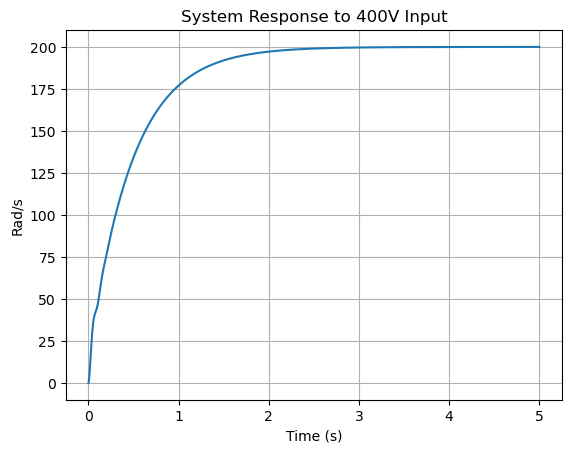

In [7]:
import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

# Define the sampling time
T = 0.00175

# Define the transfer functions
num_gpz = [0.0058540, 0, 0]
den_gpz = [1, -1.9224928, 0.9337476]

gpz = ctrl.TransferFunction(num_gpz, den_gpz, T)
gpi = 0.15 * ctrl.TransferFunction([1, -0.95], [1, -1], T)
# gpid = 1 * ctrl.TransferFunction([1, -0.2], [1, -0.1], T)

# Compute the closed-loop transfer function
sys_open_loop = ctrl.series(gpz, gpi)  # C(s) * G(s)
sys_closed_loop = ctrl.feedback(sys_open_loop, 1)

# Root locus plot
# Simulate system response to a 400V input and 0 load
time = np.arange(0, 5, T)
T_out, yout = ctrl.forced_response(sys_closed_loop, T=time, U=np.ones_like(time)*200)

# Plot the response
plt.figure()
plt.plot(T_out, yout)
plt.xlabel('Time (s)')
plt.ylabel('Rad/s')
plt.title('System Response to 400V Input')
plt.grid()
plt.show()

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Definindo as variáveis fuzzy
e = ctrl.Antecedent(np.arange(-100, 100.1, 0.1), 'e')
delta_e = ctrl.Antecedent(np.arange(-100, 100.1, 0.01), 'delta_e')
delta_u = ctrl.Consequent(np.arange(-400, 400.1, 0.1),'delta_u')

# Definindo as funções de pertinência
e.automf(names=['NG', 'NM', 'NP', 'ZE', 'PP', 'PM', 'PG'])
delta_e.automf(names=['NG', 'NM', 'NP', 'ZE', 'PP', 'PM', 'PG'])
delta_u.automf(names=['NG', 'NM', 'NP', 'ZE', 'PP', 'PM', 'PG'])

# Criando as regras fuzzy
rules = [
    ctrl.Rule(e['NG'] & delta_e['NG'], delta_u['NG']),
    ctrl.Rule(e['NG'] & delta_e['NM'], delta_u['NG']),
    ctrl.Rule(e['NG'] & delta_e['NP'], delta_u['NG']),
    ctrl.Rule(e['NG'] & delta_e['ZE'], delta_u['NG']),
    ctrl.Rule(e['NG'] & delta_e['PP'], delta_u['NM']),
    ctrl.Rule(e['NG'] & delta_e['PM'], delta_u['NP']),
    ctrl.Rule(e['NG'] & delta_e['PG'], delta_u['ZE']),

    ctrl.Rule(e['NM'] & delta_e['NG'], delta_u['NG']),
    ctrl.Rule(e['NM'] & delta_e['NM'], delta_u['NG']),
    ctrl.Rule(e['NM'] & delta_e['NP'], delta_u['NG']),
    ctrl.Rule(e['NM'] & delta_e['ZE'], delta_u['NM']),
    ctrl.Rule(e['NM'] & delta_e['PP'], delta_u['NP']),
    ctrl.Rule(e['NM'] & delta_e['PM'], delta_u['ZE']),
    ctrl.Rule(e['NM'] & delta_e['PG'], delta_u['PP']),

    ctrl.Rule(e['NP'] & delta_e['NG'], delta_u['NG']),
    ctrl.Rule(e['NP'] & delta_e['NM'], delta_u['NG']),
    ctrl.Rule(e['NP'] & delta_e['NP'], delta_u['NM']),
    ctrl.Rule(e['NP'] & delta_e['ZE'], delta_u['NP']),
    ctrl.Rule(e['NP'] & delta_e['PP'], delta_u['ZE']),
    ctrl.Rule(e['NP'] & delta_e['PM'], delta_u['PP']),
    ctrl.Rule(e['NP'] & delta_e['PG'], delta_u['PM']),

    ctrl.Rule(e['ZE'] & delta_e['NG'], delta_u['NG']),
    ctrl.Rule(e['ZE'] & delta_e['NM'], delta_u['NM']),
    ctrl.Rule(e['ZE'] & delta_e['NP'], delta_u['NP']),
    ctrl.Rule(e['ZE'] & delta_e['ZE'], delta_u['ZE']),
    ctrl.Rule(e['ZE'] & delta_e['PP'], delta_u['PP']),
    ctrl.Rule(e['ZE'] & delta_e['PM'], delta_u['PM']),
    ctrl.Rule(e['ZE'] & delta_e['PG'], delta_u['PG']),

    ctrl.Rule(e['PP'] & delta_e['NG'], delta_u['NM']),
    ctrl.Rule(e['PP'] & delta_e['NM'], delta_u['NP']),
    ctrl.Rule(e['PP'] & delta_e['NP'], delta_u['ZE']),
    ctrl.Rule(e['PP'] & delta_e['ZE'], delta_u['PP']),
    ctrl.Rule(e['PP'] & delta_e['PP'], delta_u['PM']),
    ctrl.Rule(e['PP'] & delta_e['PM'], delta_u['PG']),
    ctrl.Rule(e['PP'] & delta_e['PG'], delta_u['PG']),

    ctrl.Rule(e['PM'] & delta_e['NG'], delta_u['NP']),
    ctrl.Rule(e['PM'] & delta_e['NM'], delta_u['ZE']),
    ctrl.Rule(e['PM'] & delta_e['NP'], delta_u['PP']),
    ctrl.Rule(e['PM'] & delta_e['ZE'], delta_u['PM']),
    ctrl.Rule(e['PM'] & delta_e['PP'], delta_u['PG']),
    ctrl.Rule(e['PM'] & delta_e['PM'], delta_u['PG']),
    ctrl.Rule(e['PM'] & delta_e['PG'], delta_u['PG']),

    ctrl.Rule(e['PG'] & delta_e['NG'], delta_u['ZE']),
    ctrl.Rule(e['PG'] & delta_e['NM'], delta_u['PP']),
    ctrl.Rule(e['PG'] & delta_e['NP'], delta_u['PM']),
    ctrl.Rule(e['PG'] & delta_e['ZE'], delta_u['PG']),
    ctrl.Rule(e['PG'] & delta_e['PP'], delta_u['PG']),
    ctrl.Rule(e['PG'] & delta_e['PM'], delta_u['PG']),
    ctrl.Rule(e['PG'] & delta_e['PG'], delta_u['PG'])
]

# Criando o sistema de controle
control_system = ctrl.ControlSystem(rules)

# Simulando o sistema
fuzzy_sim = ctrl.ControlSystemSimulation(control_system)

# Definindo entradas e computando
fuzzy_sim.input['e'] = -200
fuzzy_sim.input['delta_e'] = 0
fuzzy_sim.compute()

# Obtendo o resultado
fuzzy_sim.output['delta_u']

print(f"Defuzzified value: {fuzzy_sim.output['delta_u']}\n")
for label in delta_u.terms:
    membership_value = fuzz.interp_membership(delta_u.universe, delta_u[label].mf, fuzzy_sim.output["delta_u"])
    print(f"Membership of '{label}': {membership_value}")

delta_u.view(sim=fuzzy_sim);

Defuzzified value: -355.5554636249427

Membership of 'NG': 0.666665977187146
Membership of 'NM': 0.3333340228128539
Membership of 'NP': 0.0
Membership of 'ZE': 0.0
Membership of 'PP': 0.0
Membership of 'PM': 0.0
Membership of 'PG': 0.0


c:\Users\ALUNO\anaconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


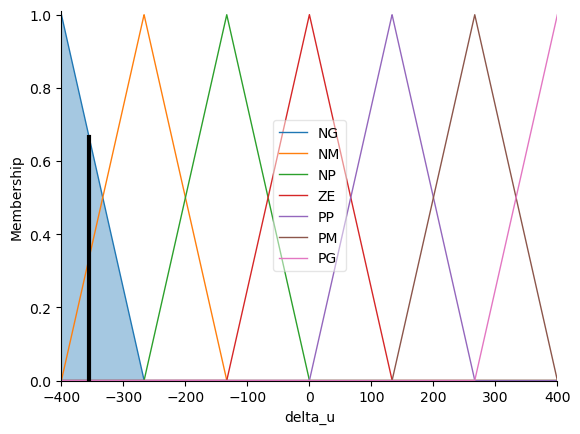

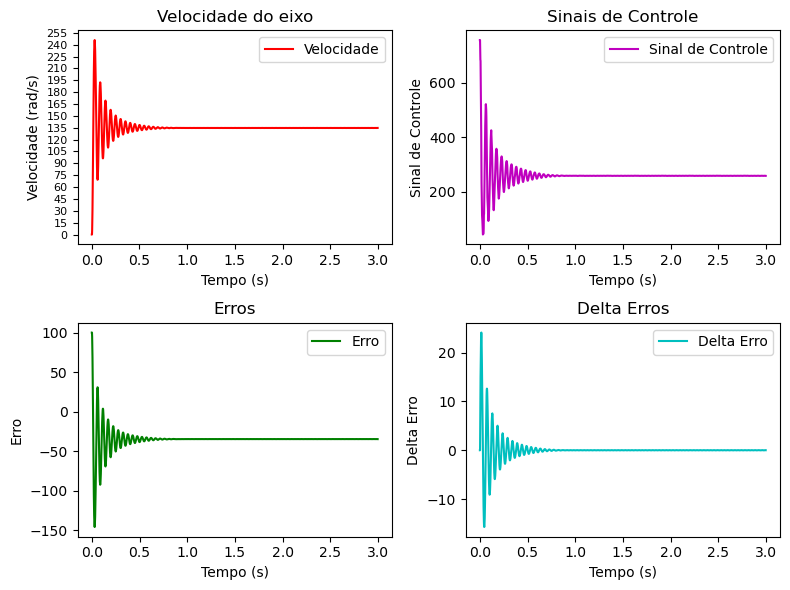

In [28]:
# Simulação Motor CC com variação de carga e variação paramétrica
from math import pi
from numpy import array, identity, arange
import matplotlib.pyplot as plt

# Definição dos parâmetros do motor
Pmec = 95 * 10**3
n = 0.913
Vn = 400
Wn = 1890 * pi / 30
Ra = 0.08
J = 0.56
La = 1.4 * 10**-3

Pele = Pmec / n
Cmn = Pmec / Wn
Ian = Pele / Vn
Kf = (Vn - Ian * Ra) / Wn
B = (Kf * Ian - Cmn) / Wn
Tm = J / B
Te = La / Ra
T = Te / 10

# Definição das matrizes A, B e C
A = array([[1 - T / Te, -Kf * T / La], [Kf * T / J, 1 - T / Tm]])

B = array([[T / La, 0], [0, -T / J]])

# Definindo parâmetros da simulação
x = array([[0], [0]])
delta_u = array([[0], [0]])
W, Ia, t = [0], [0], [0]
tempo = 0
N = int(3/T)  # Número de iterações (apróx 5 s)
setpoint = 100
errors = []
delta_errors = []
signals = []

# control_signal.defuzzify_method = "bisector"

for i in range(1, N):
    # Compute the error
    error_percent = (setpoint - W[-1])/setpoint * 100
    delta_error = 0 if len(errors) == 0 else errors[-1] - error_percent
    errors.append(error_percent)
    delta_errors.append(delta_error)

    # Set the input to the fuzzy controller
    fuzzy_sim.input["e"] = error_percent
    fuzzy_sim.input["delta_e"] = delta_error
    
    # Compute the fuzzy control signal
    fuzzy_sim.compute()

    # Get the control signal from the fuzzy controller
    control_signal_current = 400 + fuzzy_sim.output["delta_u"]
    signals.append(control_signal_current)

    delta_u.put(0, control_signal_current)

    # Calculando as saídas e armazenando-as
    x = A.dot(x) + B.dot(delta_u)

    Ia.append(x[0].item())
    W.append(x[1].item())

    # Incrementando e armazenando o tempo de simulação
    tempo += T
    t.append(tempo)


# Mostrando os gráficos de velocidade, corrente, erros e sinais em uma matriz 2x2
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8, 6))

# Gráfico de Velocidade
ax1.plot(t, W, color="r")
ax1.set_title("Velocidade do eixo")
ax1.set_xlabel("Tempo (s)")
ax1.set_ylabel("Velocidade (rad/s)")
ax1.set_yticks(arange(min(W), max(W) + 20, 15))
ax1.tick_params(axis='y', labelsize=8)
ax1.legend(["Velocidade"])

# Gráfico de Sinais de Controle
ax2.plot(t[:-1], signals, color="m")
ax2.set_title("Sinais de Controle")
ax2.set_xlabel("Tempo (s)")
ax2.set_ylabel("Sinal de Controle")
ax2.legend(["Sinal de Controle"])

# Gráfico de Erros
ax3.plot(t[:-1], errors, color="g")
ax3.set_title("Erros")
ax3.set_xlabel("Tempo (s)")
ax3.set_ylabel("Erro")
ax3.legend(["Erro"])

# Gráfico de Delta Erros
ax4.plot(t[:-1], delta_errors, color="c")
ax4.set_title("Delta Erros")
ax4.set_xlabel("Tempo (s)")
ax4.set_ylabel("Delta Erro")
ax4.legend(["Delta Erro"])

plt.tight_layout()
plt.show()
